<a href="https://colab.research.google.com/github/NOVA0206/CODSOFT_Tasks/blob/main/Task_3_(IRIS_Flower_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **#CODSOFT TASK 3 IRIS Flower Classification Dataset model**

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
       sepal_length  

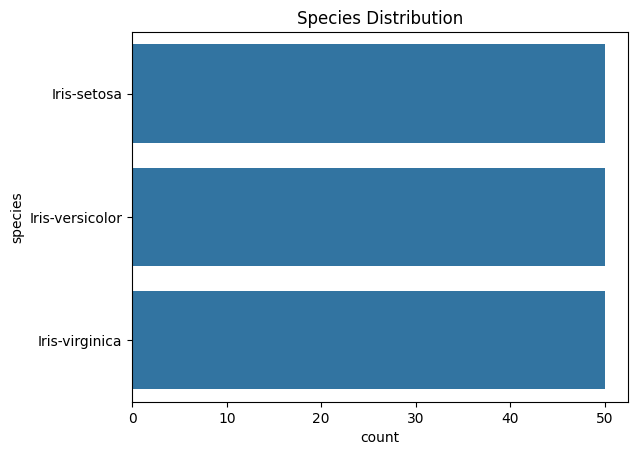

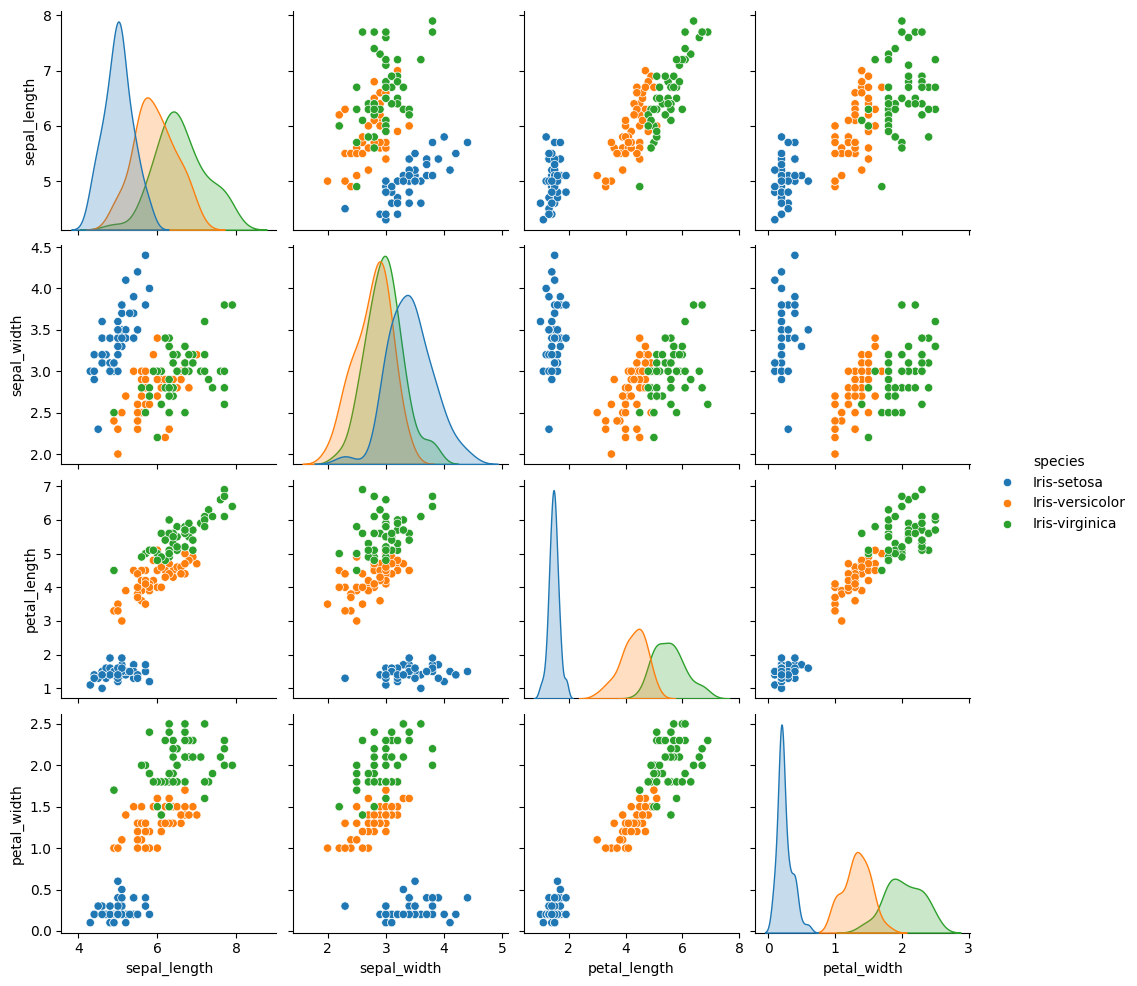

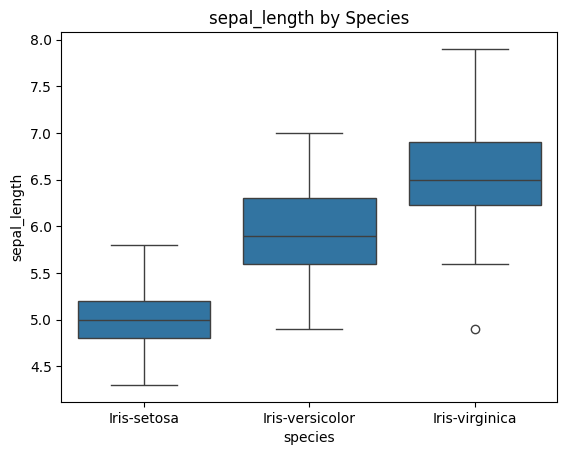

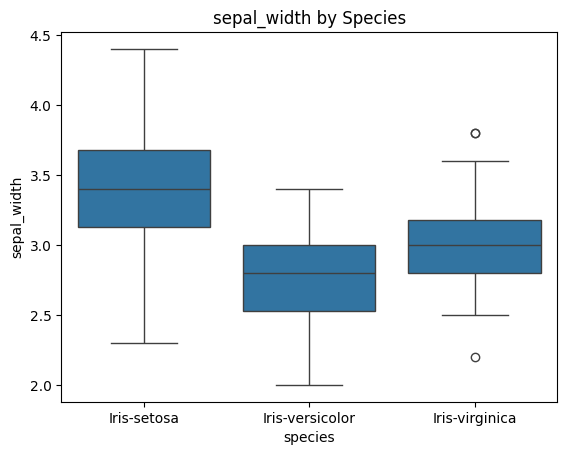

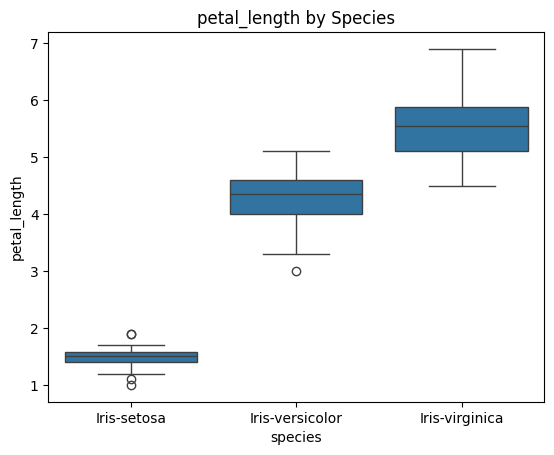

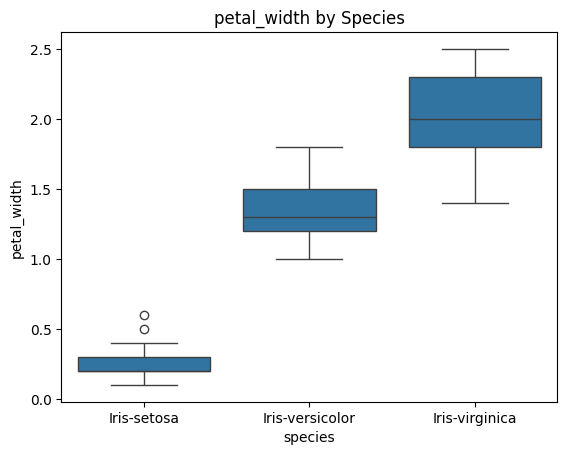

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
     sepal_length  sepal_width  petal_length  petal_width
22            4.6          3.6           1.0          0.2
15            5.7          4.4           1.5          0.4
65            6.7          3.1           4.4          1.4
11            4.8          3.4           1.6          0.2
42            4.4          3.2           1.3          0.2
..            ...          ...           ...          ...
71            6.1          2.8           4.0          1.3
106           4.9          2.5           4.5          1.7
14            5.8          4.0           1.2          0.2
92            5.8          2.6           4.0          1.2
102           7.1          3.0           5.9          2.

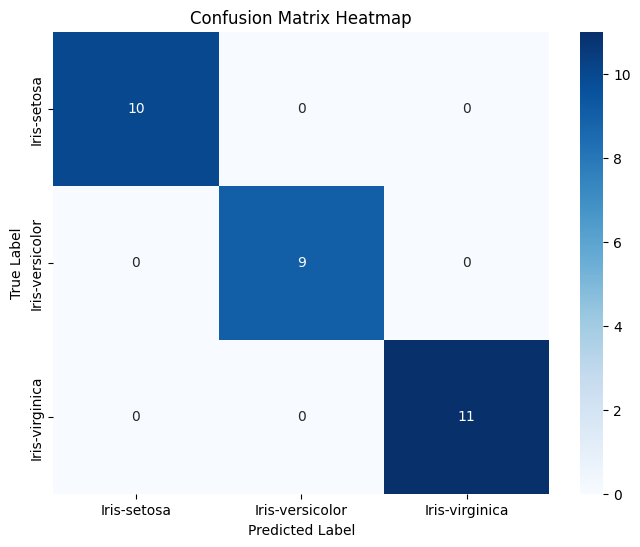

Model Accuracy: 1.0


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('IRIS.csv')

# Display the first few rows of the dataframe
print(df.head())

# Basic information about the dataset
print(df.info())

# Check for any missing values
print(df.isnull().sum())

# Statistical summary of the dataset
print(df.describe())

# Distribution of the target variable
sns.countplot(df['species'])
plt.title("Species Distribution")
plt.show()

# Pairplot to visualize the relationship between features and the target variable
sns.pairplot(df, hue='species')
plt.show()

# Boxplot to visualize the distribution of features and detect outliers
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for feature in features:
    plt.figure()
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f"{feature} by Species")
    plt.show()


# The EDA visualizations will help in understanding the dataset better

# Prepare the features and target
# Assuming 'sepal_length', 'sepal_width', 'petal_length', 'petal_width' are the features in the dataset
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]  # Selects multiple columns
y = df['species']

# Encode the target variable (species) to integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(y_encoded)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print(X_train)
print(y_train)

# Predict the test set results
y_pred = knn.predict(X_test)
print(y_pred)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()


# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')